Projet 5 - Segmentez des clients d'un site e-commerce - Prediction 1
# 1. Initialisation

>>-
## 11. Package imports

In [1]:
import numpy as np              # fast thus always used
import pandas as pd             # fast
pd.set_option("display.max_rows", 20, "display.max_columns", None)
import matplotlib.pyplot as plt # slow: 233 ns
import seaborn as sns           # SLOW BUT: 80.4 ns
cmaps = ['vlag', 'twilight_shifted', 'RdBu_r', 'coolwarm', 'seismic', 'rainbow', 'Greys_r']
import re
import my
import math
import timeit
from scipy import interpolate   # FAST BUT: 319 ns ± 2.64 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
#  %timeit import geopandas     # SLOW 
#import os
#import sys
from IPython.display import clear_output
import warnings

>>-
## 12. Data imports

In [2]:
df = pd.read_csv('dfs_1.csv') #, sep='\t')
try:
    df = df.drop('Unnamed: 0', axis=1)
    print("C'est bon j'ai supprimé la colonne 'Unnamed: 0' qui ne devrait pas exister.")
except:
    print("Y'avait pas de colonne 'Unnamed: 0'")

Y'avait pas de colonne 'Unnamed: 0'


>>-
## 13. Fonctions de plot

In [3]:
cmaps = ['vlag', 'twilight_shifted', 'RdBu_r', 'coolwarm', 'seismic', 'rainbow']

In [4]:
def pllot(stRFM, rot="azim", lims=None):
    '''
    rot: None, "elev" or "azim"
    '''
    if rot == None:
        ploot(stRFM, lims=lims)
    if rot == "elev":
        for elv in [-90, -60, -30, 0, 30, 60, 90]:
            ploot(stRFM, azim=120, elev=elv, lims=lims)
    if rot == "azim":
        for azm in [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]:
            ploot(stRFM, azim=azm, elev=30, lims=lims)

In [5]:
def ploot(stRFM, azim=120, elev=30, lims=None):
    '''
    ploot prend en entrée une string de length 6 alternant un signe avec une lettre dans rfm.  
    Cela permet de choisir la disposition des axes pour le plot.  
    
    (elev,azim) = 30,120 # xyz default view
                = 0, 270 # xz view
                = 0, 0   # yz view
                = 0, -90 # xy view
    '''
    strm = str(model).split('(')[0]
    stRFM = stRFM.upper()
    fig = plt.figure(figsize=(20, 3))
    ax = fig.add_subplot(projection='3d')
    #ax.scatter(X.R, X.M, X.F, c=y_pred, cmap="tab20")
    diRFM = []
    for i,j in enumerate([0,2,4]):
        diRFM.append(".5" + stRFM[j] + "(-.5) " + stRFM[j] + " 1*X[stRFM[" + str(j + 1) + "]]")
    ax.scatter(eval(diRFM[0]), eval(diRFM[1]), eval(diRFM[2]), c=y_pred, cmap="tab20", s=10, alpha=.3)
    dfsc = pd.DataFrame(model.cluster_centers_)
    xsc = dfsc[0]
    ysc = dfsc[1]
    zsc = dfsc[2]
    ax.plot(xsc,zsc,ysc,
               "o", markerfacecolor="#bbbbbb", markeredgecolor="k", markersize=6)
    plt.title(strm)
    lbl = [0, 0, 0]
    for i,j in enumerate([1,3,5]):
        if stRFM[j] == "R":
            lbl[i] = "Recency"
        elif stRFM[j] == "F":
            lbl[i] = "Frequency"
        else:
            lbl[i] = "Monetary"
        if stRFM[j-1] == "-":
                lbl[i] = "1 - " + lbl[i]
    plt.xlabel(lbl[0],fontsize=16)
    plt.xticks(fontsize=14)
    plt.ylabel(lbl[1],fontsize=16)
    plt.yticks(fontsize=14)
    ax.set_zlabel(lbl[2],fontsize=16)
    #ax.set_zticks(fontsize=14)
    plt.legend
    ax.elev = elev
    ax.azim = azim
    if lims != None:
        plt.xlim(lims[0],lims[1])
        plt.ylim(lims[2],lims[3])
        ax.set_zlim(lims[4],lims[5])

In [6]:
def ttlng():
    plt.title("KMeans")
    plt.xlabel("R",fontsize=16)
    plt.xticks(fontsize=14)
    plt.ylabel("M",fontsize=16)
    plt.yticks(fontsize=14)
    ax.set_zlabel("F",fontsize=16)
#    ax.set_zticks(fontsize=14)

>-
# 2. Classifications

>>-
## 2.1. Initialisation

In [7]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [8]:
cols_num = ["R","F","M"]
scalers = [MinMaxScaler(), RobustScaler(), StandardScaler()]

In [72]:
X = df[cols_num]
X[cols_num] = scalers[2].fit_transform(X[cols_num])

C:\Users\achou\AppData\Local\Temp\ipykernel_15180\3103475676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols_num] = scalers[2].fit_transform(X[cols_num])


In [14]:
X = df[cols_num]
print(X.shape, sum(X.F == 1))
pct = (1-sum(X.F == 1)/X.shape[0])*100
print("Il y a {a:.1f}% de clients ayant effectué plus d'un achat dans le dataset avant subsampling.".format(a=pct))
ns=1000
X = X.sample(n=ns, weights=None, random_state=1) #frac=.1, weights="F", random_state=1)
print(X.shape, sum(X.F == 1))
pct = (1-sum(X.F == 1)/X.shape[0])*100
print("Il y a {a:.1f}% de clients ayant effectué plus d'un achat dans la subsample sélectionnée.".format(a=pct))

(96095, 3) 90366
Il y a 6.0% de clients ayant effectué plus d'un achat dans le dataset avant subsampling.
(1000, 3) 944
Il y a 5.6% de clients ayant effectué plus d'un achat dans la subsample sélectionnée.


In [16]:
Xl = X.copy()
X[cols_num] = scalers[1].fit_transform(X[cols_num])
Xl.F = np.log(1+Xl.F)/np.log(2)
Xl.M = np.log(1+Xl.M)/np.log(2)
print("log    ", end="")
Xllll = Xl.copy()
Xl[cols_num] = scalers[1].fit_transform(Xl[cols_num])
for i in range(3):
    Xllll.F = np.log(1+Xllll.F)/np.log(2)
    print(", log", end="")
Xllll[cols_num] = scalers[1].fit_transform(Xllll[cols_num])

log    , log, log, log

In [17]:
display(X[X.F != 0].head(2))
display(Xl[Xl.F != 0].head(2))
display(Xllll[Xllll.F != 0].head(2))

,R,F,M
72100,1.509931,1.0,-0.520173
18986,-0.520392,1.0,4.360340


,R,F,M
72100,1.509931,0.584963,-0.828548
18986,-0.520392,0.584963,1.638110


,R,F,M
72100,1.509931,0.166699,-0.828548
18986,-0.520392,0.166699,1.638110


>>-
## 2.2. Clustering log KMeans

In [18]:
model = KMeans(n_clusters=8, init="k-means++")
model = model.fit(Xl)
#y_pred = model.fit_predict(X)
y_pred = model.predict(Xl)

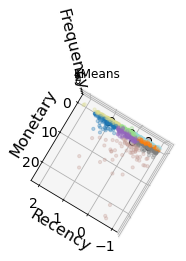

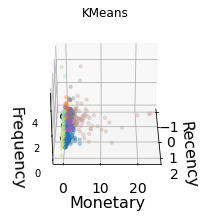

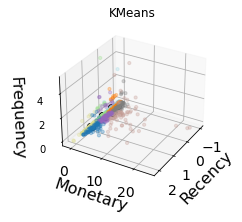

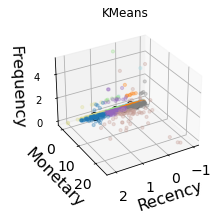

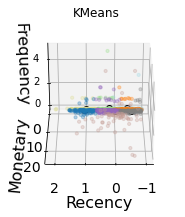

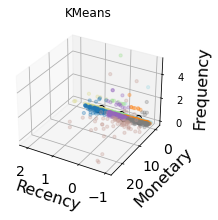

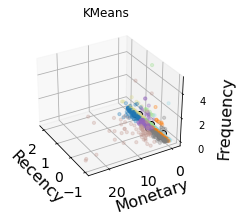

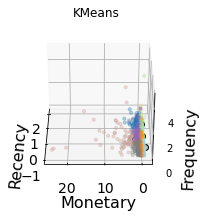

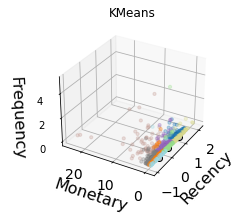

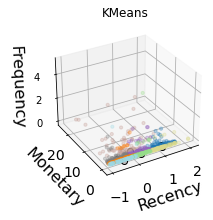

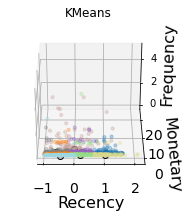

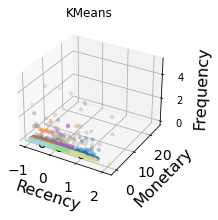

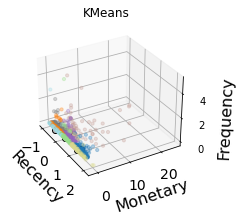

In [19]:
ploot("+r+m+f", elev=90)
pllot("+r+m+f", rot="azim")

Il n'arrive pas à différencier les F = 1 des F > 1. C'est très grave.

In [20]:
dfsc = pd.DataFrame(model.cluster_centers_)
xsc = dfsc[0]
ysc = dfsc[1]
zsc = dfsc[2]

(0.0, 1.0)

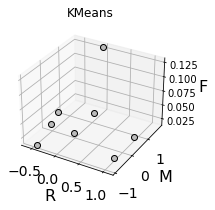

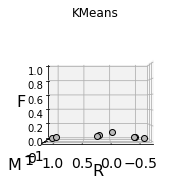

In [21]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(projection='3d')
ax.plot(xsc,zsc,ysc,
        "o", markerfacecolor="#bbbbbb", markeredgecolor="k", markersize=6)
ttlng()

fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(projection='3d')
ax.plot(xsc,zsc,ysc,
        "o", markerfacecolor="#bbbbbb", markeredgecolor="k", markersize=6)
ttlng()
ax.elev = 0
ax.azim = 90
ax.set_zlim(0,1)

On voit clairement que F est quasiment ignoré par ce KMeans.

In [22]:
model = KMeans(n_clusters=8, init="k-means++")
model = model.fit(Xllll)
#y_pred = model.fit_predict(X)
y_pred = model.predict(Xllll)

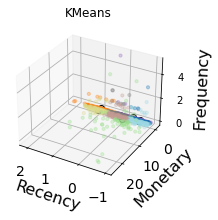

In [23]:
ploot("+r+m+f")

C:\Users\achou\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R', ylabel='M'>

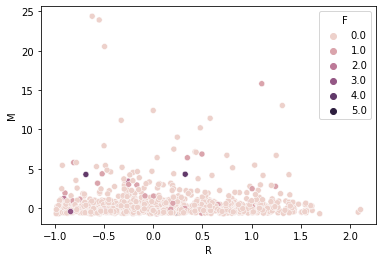

In [60]:
sns.scatterplot(X.R, X.M, X.F)

In [24]:
dfsc = pd.DataFrame(model.cluster_centers_)
xsc = dfsc[0]
ysc = dfsc[1]
zsc = dfsc[2]

(0.0, 1.0)

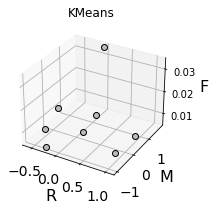

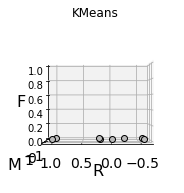

In [25]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(projection='3d')
ax.plot(xsc,zsc,ysc,
        "o", markerfacecolor="#bbbbbb", markeredgecolor="k", markersize=6)
ttlng()

fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(projection='3d')
ax.plot(xsc,zsc,ysc,
        "o", markerfacecolor="#bbbbbb", markeredgecolor="k", markersize=6)
ttlng()
ax.elev = 0
ax.azim = 90
ax.set_zlim(0,1)

>>-
## 2.3. Clustering linéaire

>>>-
### 2.3.1. KMeans

In [26]:
model = KMeans(n_clusters=8, init="k-means++")
model = model.fit(X)
#y_pred = model.fit_predict(X)
y_pred = model.predict(X)

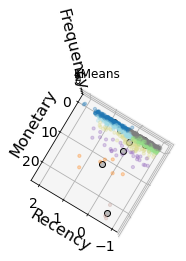

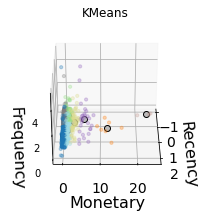

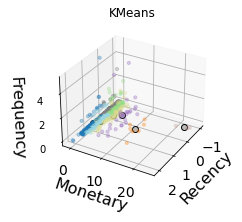

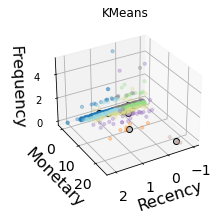

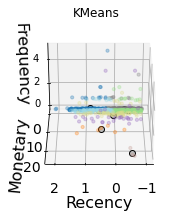

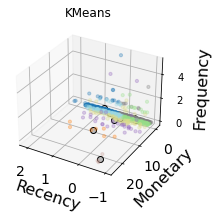

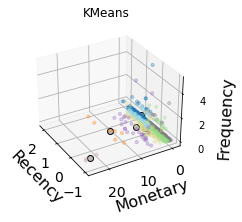

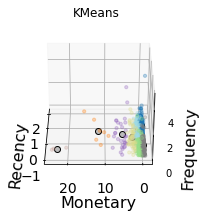

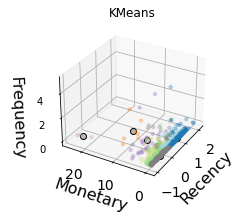

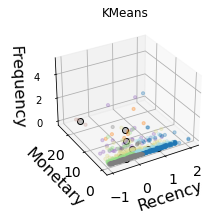

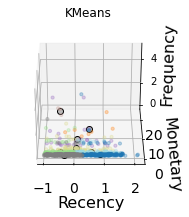

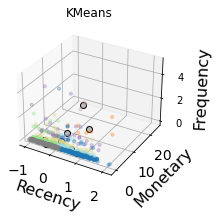

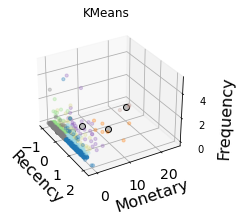

In [27]:
ploot("+r+m+f", elev=90)
pllot("+r+m+f", rot="azim")

Paradoxalement le clustering a l'air bien meilleur alors que les points sont tous condensés vers l'axe (F,M) = (0,0).

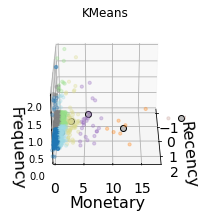

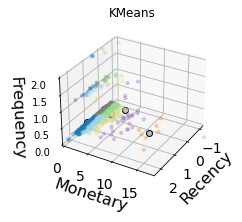

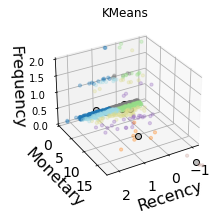

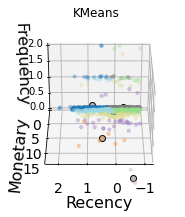

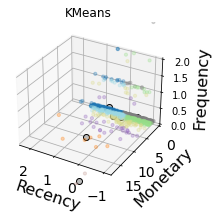

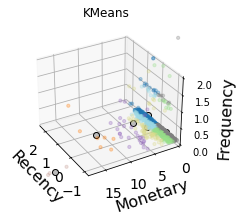

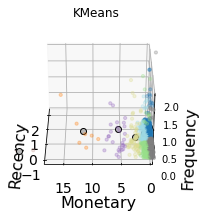

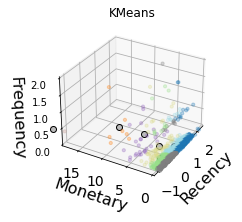

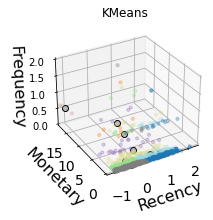

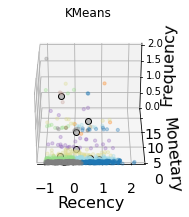

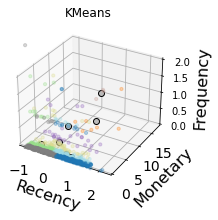

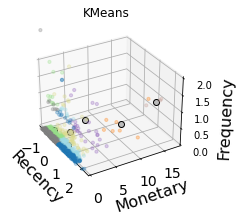

In [32]:
pllot("+r+m+f", rot="azim", lims=[-1.2,2.4,0,18,0,2])

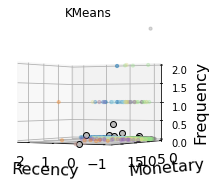

In [33]:
ploot("+r+m+f", elev=0, lims=[-1.2,2.4,0,18,0,2])

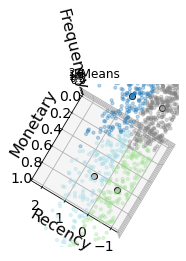

In [35]:
ploot("+r+m+f", elev=90, lims=[-1.2,2.4,0,1,0,2])

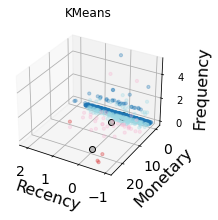

In [61]:
ploot("+r+m+f")

En fait non le clustering n'est pas meilleur sans passage au log. Il ignore toujours les valeurs de F.  
Par ailleurs 3 à 5 clusters devraient suffire.  
Passons à la recherche du nombre de clusters idéal.

In [123]:
import matplotlib.cm as cm

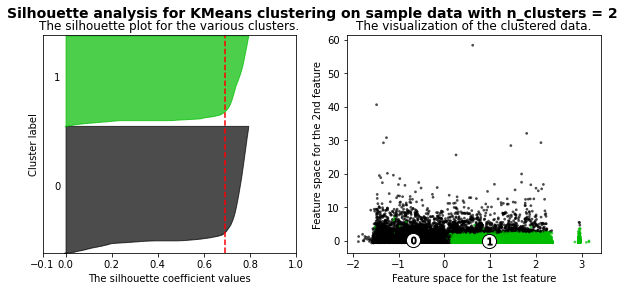

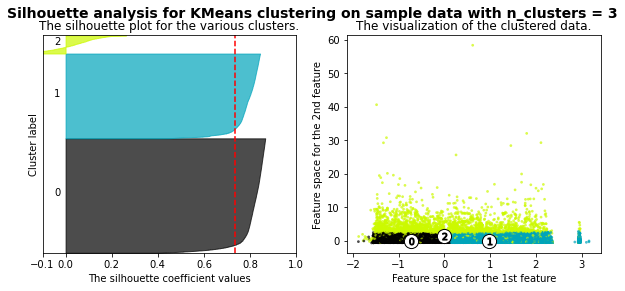

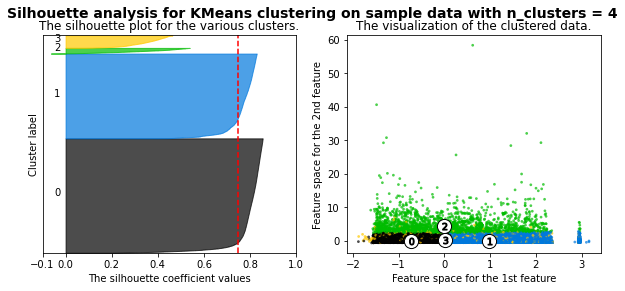

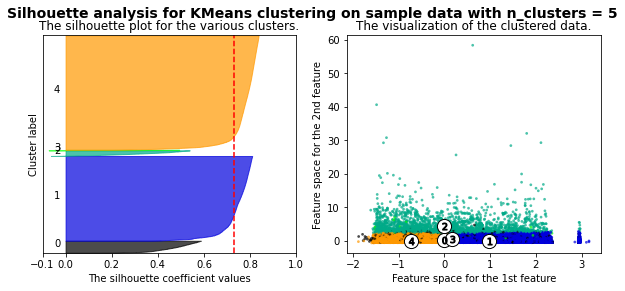

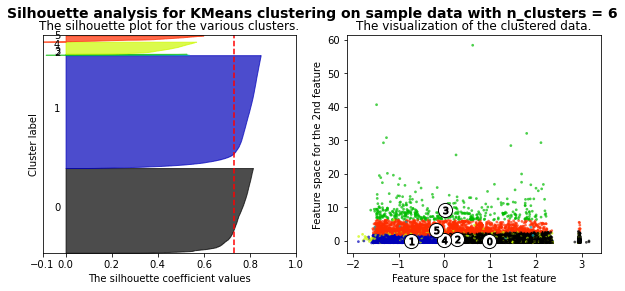

Text(0, 0.5, 'Some des carrés intra-cluster (WCSS)')

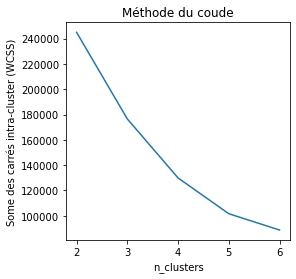

In [125]:
wcss = []
range_n_clusters = range(2,7)
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    wcss.append(clusterer.inertia_)
    silhouette_avg = silhouette_score(X, cluster_labels)
#    print(
#        "For n_clusters =",
#        n_clusters,
#        "The average silhouette_score is :",
#        silhouette_avg,
#    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.R, X.M, marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 2],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[2], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

fig = plt.figure(figsize=(4, 4))
plt.plot(range_n_clusters, wcss)
plt.title("Méthode du coude")
plt.xlabel("n_clusters")
plt.ylabel("Some des carrés intra-cluster (WCSS)")

Je trouve avec les deux méthodes que 2, 3 ou 4 clusters sont raisonnables.  
On voit clairement que 5+ clusters ça amène une séparation arbitraire à mi-M des clients à basse R mais pas des clients à haute R.  
2 clusters me semble trop peu même si c'est le plus haut score de silhouette.

In [109]:
X = df[cols_num]
X[cols_num] = scalers[2].fit_transform(X[cols_num])

C:\Users\achou\AppData\Local\Temp\ipykernel_15180\3103475676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols_num] = scalers[2].fit_transform(X[cols_num])


In [110]:
model = KMeans(n_clusters=5, init="random")
model = model.fit(X)
#y_pred = model.fit_predict(X)
y_pred = model.predict(X)

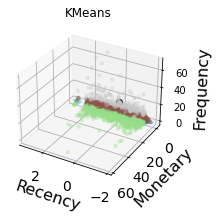

In [111]:
ploot("+r+m+f")

C:\Users\achou\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R', ylabel='M'>

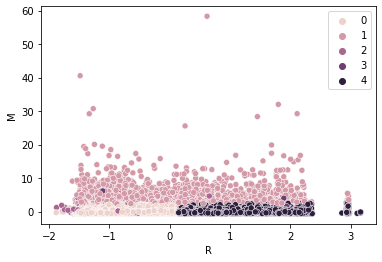

In [112]:
sns.scatterplot(X.R, X.M, y_pred)

C:\Users\achou\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R', ylabel='F'>

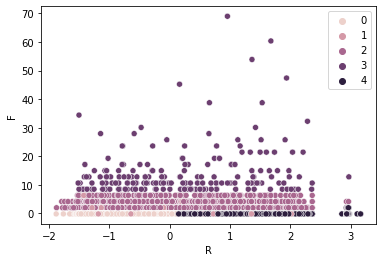

In [113]:
sns.scatterplot(X.R, X.F, y_pred)

C:\Users\achou\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='F', ylabel='M'>

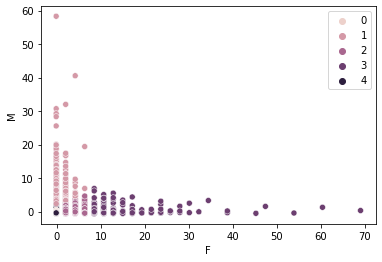

In [114]:
sns.scatterplot(X.F, X.M, y_pred)

In [115]:
#X = scalers[2].inverse transfomr

In [116]:
df["cluster4"] = pd.Series(y_pred)

In [117]:
X["cluster4"] = pd.Series(y_pred) #model.labels_

C:\Users\achou\AppData\Local\Temp\ipykernel_15180\1631473652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster4"] = pd.Series(y_pred) #model.labels_


In [120]:
X.groupby("cluster4").mean()

,R,F,M
cluster4,,,
0,-0.721932,-0.175282,-0.135845
1,-0.007443,0.011810,4.441455
2,-0.003414,2.337024,0.149675
3,0.156353,14.097693,0.399098
4,0.974831,-0.174821,-0.135865


In [121]:
df.groupby("cluster4").mean()

,R,F,M
cluster4,,,
0,1.533131e+07,1.000000,135.155943
1,2.480152e+07,1.086538,1194.470036
2,2.485492e+07,2.162055,201.233228
3,2.697256e+07,7.601896,258.956540
4,3.782108e+07,1.000213,135.151227


In [119]:
stats = pd.DataFrame(columns = ["cluster","center_coords","","","cluster_std","","","n_clients"])
for i, j in enumerate(pd.Series(y_pred).unique()):
    clust = X.reset_index()[pd.Series(y_pred) == j]
    stats.loc[i] = [j, model.cluster_centers_[i][0], model.cluster_centers_[i][1], model.cluster_centers_[i][2], clust.R.std(), clust.M.std(), clust.F.std(), clust.shape[0]]
stats

,cluster,center_coords,,,cluster_std,,,n_clients
0,0.0,-0.721974,-0.175282,-0.136024,0.473390,0.468825,1.250679e-13,50599.0
1,4.0,-0.006475,0.011286,4.435157,0.631682,0.479522,3.158447e-02,37476.0
2,2.0,-0.003414,2.337024,0.149675,0.982484,0.674302,9.582016e-01,5313.0
3,1.0,0.156353,14.097693,0.399098,0.989722,3.006531,6.695591e-01,2496.0
4,3.0,0.974825,-0.174821,-0.136058,1.071552,1.332666,8.839432e+00,211.0


In [ ]:
=r

In [ ]:
#sklearn.metrics.adjusted_rand_score
#sklearn.cluster.KernelKMeans

>>>-
### 2.3.2. DBscan

check % F=1
sample
re-check
clustering
check que le groupe contenant tous les F=1 et uniquement des F=1 (s'il existe) représente encore une fois 97%.

>>>-
### 2.3.3. Agglomerative/hierarchical clustering

In [ ]:
model = KMeans(n_clusters=8, init="k-means++")
model = model.fit(X)
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R,X.M,X.F, c=model.labels_, cmap="tab20")
plt.title("KMeans")
plt.xlabel("R",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("M",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("F",fontsize=16)
#ax.set_zticks(fontsize=14)
ax.elev = -30
ax.azim = 120
plt.legend


In [ ]:
model = KMeans(n_clusters=8, init="random")
model = model.fit(X)
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R,X.M,X.F, c=model.labels_, cmap="tab20")
plt.title("KMeans")
plt.xlabel("R",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("M",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("F",fontsize=16)
#ax.set_zticks(fontsize=14)
ax.elev = -30
ax.azim = 120
plt.legend


In [ ]:
model = KMeans(n_clusters=8, init="random")
model = model.fit(X)
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R,X.M,X.F, c=model.labels_, cmap="tab20")
plt.title("KMeans")
plt.xlabel("R",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("M",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("F",fontsize=16)
#ax.set_zticks(fontsize=14)
ax.elev = 90
ax.azim = 120
plt.legend


In [ ]:
model.cluster_centers_

In [ ]:
len(model.labels_)

In [ ]:
set(model.labels_)

In [ ]:
dfsc = pd.DataFrame(model.cluster_centers_)
xsc = dfsc[0]
ysc = dfsc[1]
zsc = dfsc[2]
ax.scatter(xsc,zsc,ysc, c="k")

In [ ]:

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(xsc,zsc,ysc, c="k")
plt.xlabel("R",fontsize=16)
plt.ylabel("M",fontsize=16)
ax.set_zlabel("F",fontsize=16)
plt.xlim(0,1)
plt.ylim(0,1)

In [ ]:

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(xsc,zsc,ysc, c="k")
plt.xlabel("R",fontsize=16)
plt.ylabel("M",fontsize=16)
ax.set_zlabel("F",fontsize=16)
plt.xlim(0,1)
plt.ylim(0,1)
ax.set_zlim(0,1)

In [ ]:
model = KMeans(n_clusters=8, init="k-means++")
model = model.fit(X)
for i in [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]:
    fig = plt.figure(figsize=(20, 3))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X.R,X.M,X.F, c=model.labels_, cmap="tab20")
    plt.title("KMeans")
    plt.xlabel("R",fontsize=16)
    plt.xticks(fontsize=14)
    plt.ylabel("M",fontsize=16)
    plt.yticks(fontsize=14)
    ax.set_zlabel("F",fontsize=16)
    #ax.set_zticks(fontsize=14)
    ax.elev = 0
    ax.azim = i
    plt.legend


In [ ]:
pllot("+r+m+f", rot="azim")

In [ ]:
model = KMeans(n_clusters=5, init="k-means++")
y_pred = model.fit_predict(X)
#db = model.fit(X)
#set(db.labels_)

In [ ]:
ploot("+r+m+f")
ploot("+f-m+r")
ploot("-f+m-r")

In [ ]:
model = KMeans(n_clusters=8, init="k-means++")
y_pred = model.fit_predict(X)
#db = model.fit(X)
#set(db.labels_)

In [ ]:
#from mpl_toolkits import mplot3d

In [ ]:
#%matplotlib notebook

In [ ]:
ploot("+r+m+f")
ploot("+r+m+f",120,45)
ploot("+r+m+f",120,80)
ploot("+f-m+r")
ploot("-f+m-r")


J'ai l'impression que ce clustering KMeans se fait uniquement dans le plan (R,M) et ne tient jamais compte des valeurs de F.

In [ ]:
X[cols_num] = scalers[0].fit_transform(df[cols_num])

In [ ]:
model = KMeans(n_clusters=8, init="k-means++")
model = model.fit(X)
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R,X.M,X.F, c=model.labels_, cmap="tab20")
plt.title("KMeans")
plt.xlabel("R",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("logM",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("loglogF",fontsize=16)
#ax.set_zticks(fontsize=14)
ax.elev = -30
ax.azim = 120
plt.legend


In [ ]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R,X.M,X.F, c=model.labels_, cmap="tab20")
plt.title("KMeans")
plt.xlabel("R",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("logM",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("loglogF",fontsize=16)
#ax.set_zticks(fontsize=14)
ax.elev = 30
ax.azim = 120
plt.legend

In [ ]:

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R,X.M,X.F, c=model.labels_, cmap="tab20")
plt.title("KMeans")
plt.xlabel("R",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("logM",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("loglogF",fontsize=16)
#ax.set_zticks(fontsize=14)
ax.elev = 30
ax.azim = 300
plt.legend

In [ ]:
xsc = pd.DataFrame(model.cluster_centers_)[0]
ysc = pd.DataFrame(model.cluster_centers_)[1]
zsc = pd.DataFrame(model.cluster_centers_)[2]

In [ ]:

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(xsc,zsc,ysc, c="k")
plt.xlabel("R",fontsize=16)
plt.ylabel("logM",fontsize=16)
ax.set_zlabel("loglogF",fontsize=16)
plt.xlim(0,1)
plt.ylim(0,1)
#ax.set_zlim(0,1)

In [ ]:
model = DBSCAN(eps=.3,min_samples=10)

In [ ]:
#db = DBSCAN(eps=.3,min_samples=10).fit(X)
db = model.fit(X)

In [ ]:
db.labels_

In [ ]:
db.core_sample_indices_

In [ ]:
np.zeros_like(db.labels_, dtype=bool)

In [ ]:
set(db.labels_)

In [ ]:
model = DBSCAN(eps=.3,min_samples=3)
db = model.fit(X)
set(db.labels_)

In [ ]:
model = DBSCAN(eps=.3,min_samples=1)
db = model.fit(X)
set(db.labels_)

In [ ]:
model = DBSCAN(eps=.3,min_samples=2)
db = model.fit(X)
set(db.labels_)

In [ ]:
model = DBSCAN(eps=.1,min_samples=2)
y_pred = model.fit_predict(X)
db = model.fit(X)
set(db.labels_)

In [ ]:
X

In [ ]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R, X.M, X.F, c=y_pred, cmap="tab20")
plt.title("DBSCAN")
plt.xlabel("Recency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("Frequency",fontsize=16)
#ax.set_zticks(fontsize=14)
plt.legend

In [ ]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.F, (1-X.M), X.R, c=y_pred, cmap="tab20")
plt.title("DBSCAN")
plt.xlabel("Frequency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("(1 - Monetary)",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("Recency",fontsize=16)
#ax.set_zticks(fontsize=14)
plt.legend

In [ ]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter((1-X.F), X.M, (1-X.R), c=y_pred, cmap="tab20")
plt.title("DBSCAN")
plt.xlabel("(1 - Frequency)",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("(1 - Recency)",fontsize=16)
#ax.set_zticks(fontsize=14)
plt.legend

In [ ]:
plt.scatter(X.R, X.F, c=y_pred, cmap=cmaps[5])
plt.title("DBSCAN")
plt.xlabel("Recency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Frequency",fontsize=16)
plt.yticks(fontsize=14)
plt.legend

In [ ]:
plt.scatter(X.R, X.M, c=y_pred, cmap=cmaps[5])
plt.title("DBSCAN")
plt.xlabel("Recency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
plt.legend

In [ ]:
plt.scatter(X.F, X.M, c=y_pred, cmap=cmaps[5])
plt.title("DBSCAN")
plt.xlabel("Frequency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
plt.legend

In [ ]:
plot les db.label_ == 1 par exemple (voir la syntaxe)

In [ ]:
model = DBSCAN(eps=1,min_samples=2)
db = model.fit(X)
set(db.labels_)

In [ ]:
model = DBSCAN(eps=10,min_samples=2)
db = model.fit(X)
set(db.labels_)

In [ ]:
model = DBSCAN(eps=5,min_samples=5)
db = model.fit(X)
set(db.labels_)

In [ ]:
model = KMeans(n_clusters=5, init="k-means++")
y_pred = model.fit_predict(X)
db = model.fit(X)
set(db.labels_)

In [ ]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R, X.M, X.F, c=y_pred, cmap="tab20")
plt.title("DBSCAN")
plt.xlabel("Recency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("Frequency",fontsize=16)
#ax.set_zticks(fontsize=14)
plt.legend

Pas terrible. Il a juste mis un centroïde à chaque coin.

In [ ]:
model = KMeans(n_clusters=3, init="k-means++")
y_pred = model.fit_predict(X)
db = model.fit(X)
set(db.labels_)

In [ ]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R, X.M, X.F, c=y_pred, cmap="tab20")
plt.title("DBSCAN")
plt.xlabel("Recency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("Frequency",fontsize=16)
#ax.set_zticks(fontsize=14)
plt.legend

Pas terrible. Il a juste aligné 3 centroïdes sur l'axe Monetary=.5.

In [ ]:
model = AgglomerativeClustering(n_clusters=5)
y_pred = model.fit_predict(X)
db = model.fit(X)
set(db.labels_)

In [ ]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R, X.M, X.F, c=y_pred, cmap="tab20")
plt.title("DBSCAN")
plt.xlabel("Recency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("Frequency",fontsize=16)
#ax.set_zticks(fontsize=14)
plt.legend

Même problème qu'avec KMeans.

In [ ]:
model = AgglomerativeClustering(n_clusters=3)
y_pred = model.fit_predict(X)
db = model.fit(X)
set(db.labels_)

In [ ]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R, X.M, X.F, c=y_pred, cmap="tab20")
plt.title("DBSCAN")
plt.xlabel("Recency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("Frequency",fontsize=16)
#ax.set_zticks(fontsize=14)
plt.legend

Même problème qu'avec KMeans.